In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

# # Scikt_learn
# 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LinearRegression

# # Evaluation
# from sklearn.metrics import r2_score #R2
# from sklearn.metrics import mean_squared_error #RMSE

# # Data Visualisation
# import matplotlib.pyplot as plt
# import seaborn as sns

EDA Import Data And Explore

In [32]:
data = pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [33]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [36]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [37]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [38]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis = 1) #  axis = 1 need it every time to drop colume
y = data['median_house_value']

In [39]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
test_data = X_train.join(y_train)
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17634,-121.93,37.27,28.0,3428.0,753.0,1753.0,729.0,4.1033,<1H OCEAN,281000.0
6837,-118.12,34.08,36.0,2433.0,585.0,1565.0,563.0,3.2344,<1H OCEAN,234900.0
11892,-117.35,33.99,45.0,131.0,28.0,89.0,31.0,2.6071,INLAND,112500.0
1594,-122.12,37.91,34.0,5683.0,755.0,1962.0,723.0,8.3678,NEAR BAY,455300.0
10034,-121.08,39.21,17.0,3033.0,590.0,1319.0,583.0,2.4811,INLAND,111800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

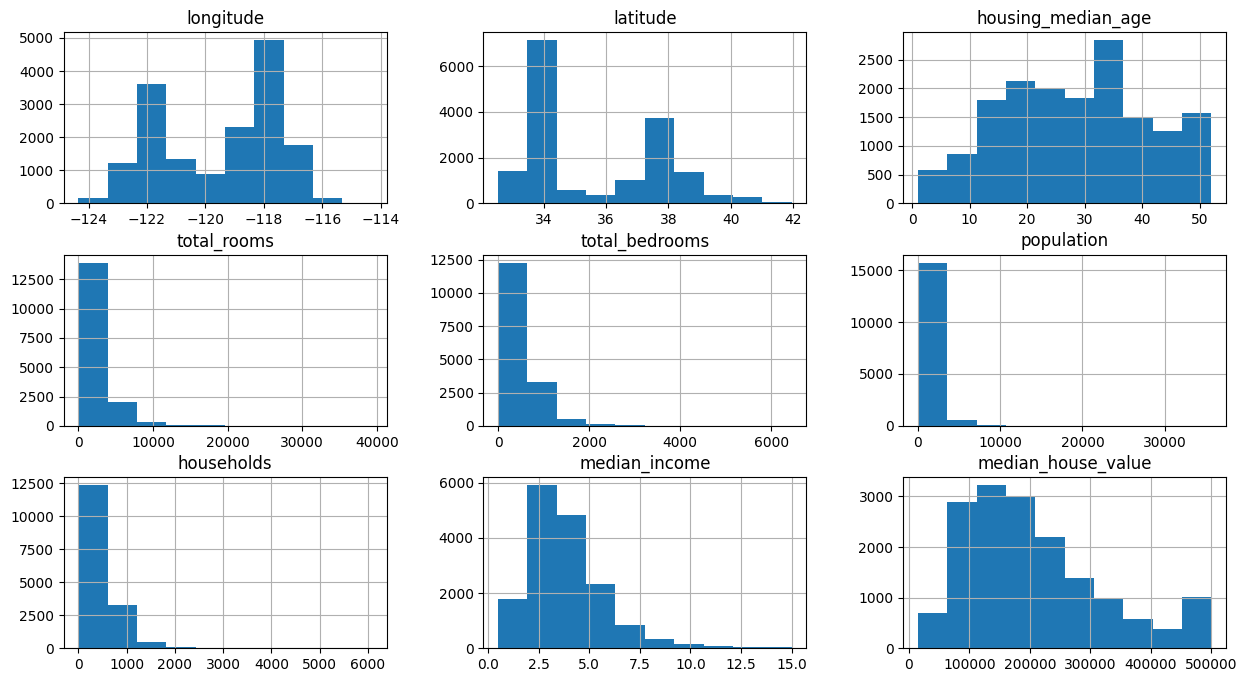

In [42]:
test_data.hist(figsize=(15, 8))

<Axes: >

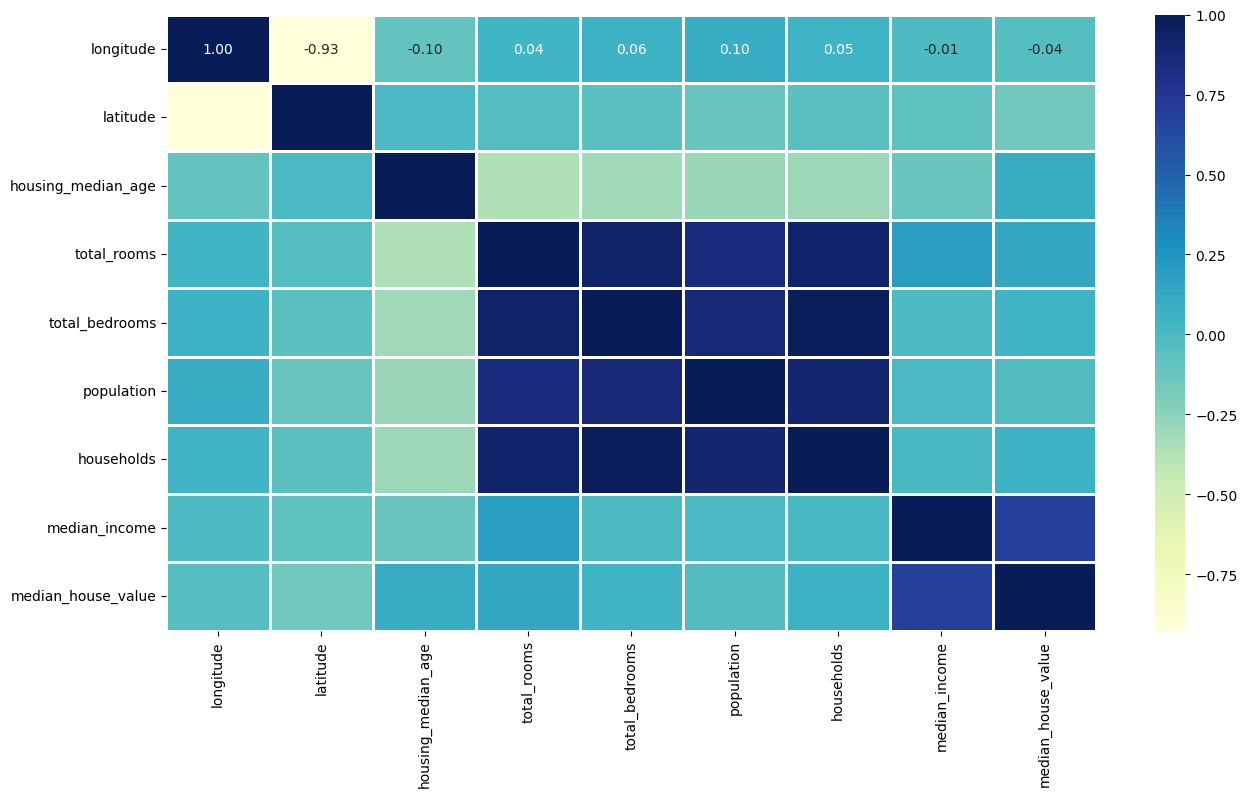

In [43]:
train_data = train_data.select_dtypes('number') # select only numeric columns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu',fmt='.2f', linewidth = 1)

In [44]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
train_data['population'] = np.log(train_data['population'] + 1 )
train_data['households'] = np.log(train_data['households'] + 1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

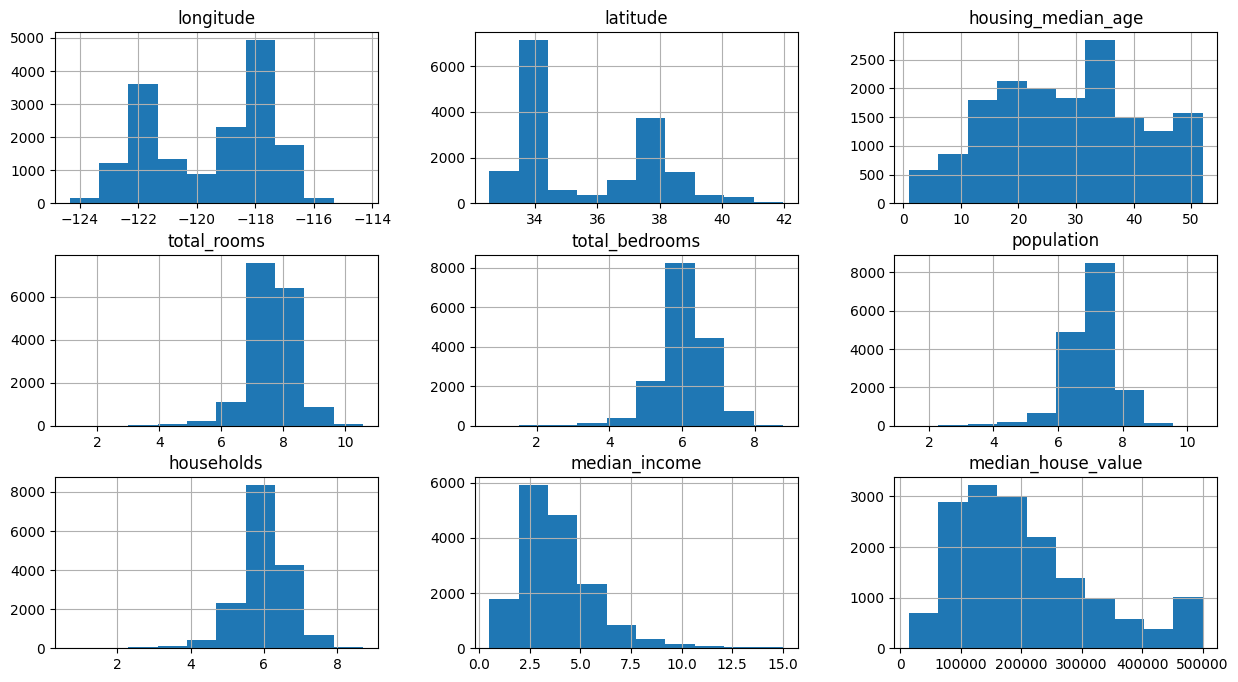

In [45]:
train_data.hist(figsize=(15, 8))			

In [46]:
train_data = X_train.join(y_train) # rejoin the data to readd 'ocean_proximity'
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7255
INLAND        5177
NEAR OCEAN    2113
NEAR BAY      1797
ISLAND           4
Name: count, dtype: int64

In [47]:
train_data=pd.get_dummies(train_data, columns=['ocean_proximity'])

<Axes: >

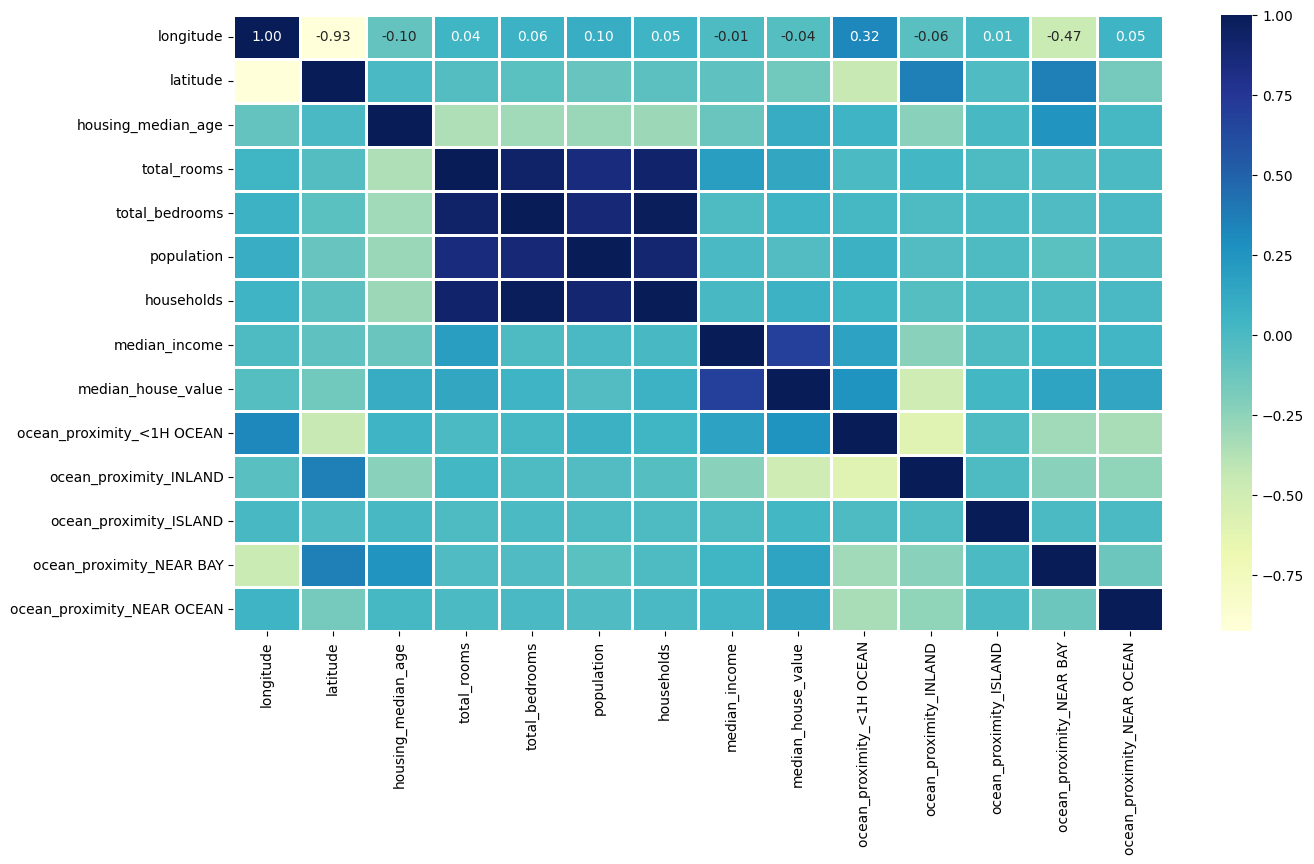

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu',fmt='.2f', linewidth = 1)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

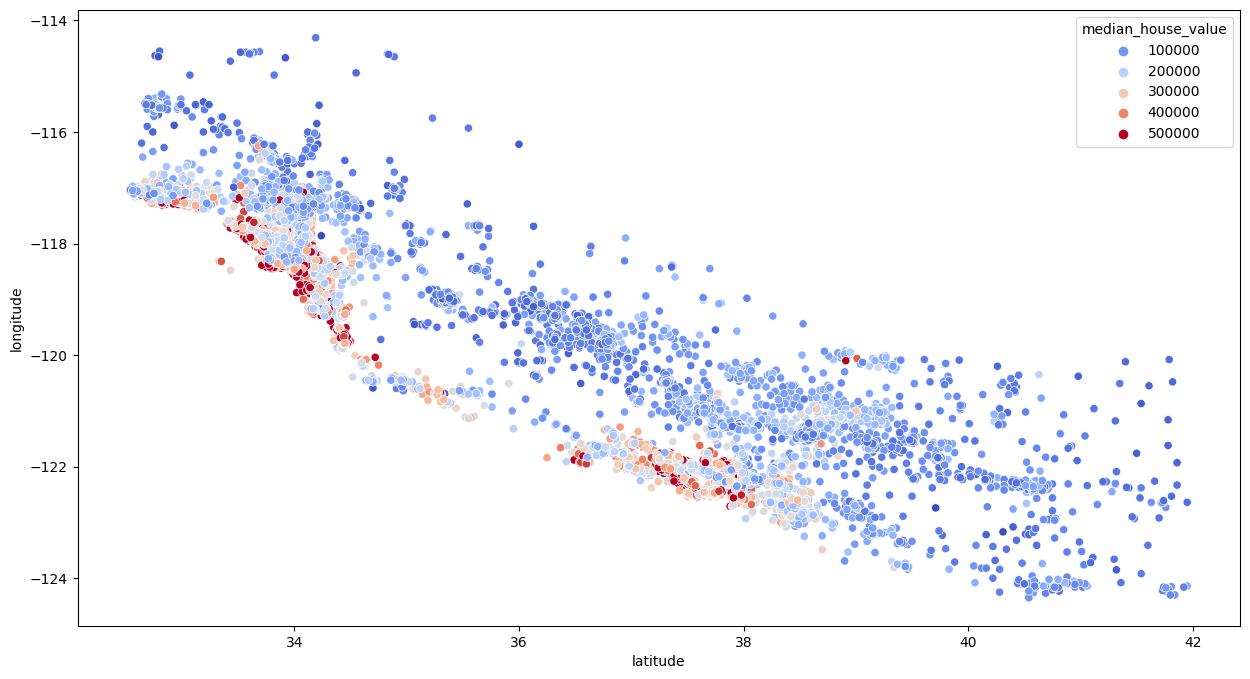

In [49]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y = 'longitude', data= train_data, hue = 'median_house_value', palette = 'coolwarm' )

In [50]:
train_data['bedrooms']= train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/ train_data['households']


<Axes: >

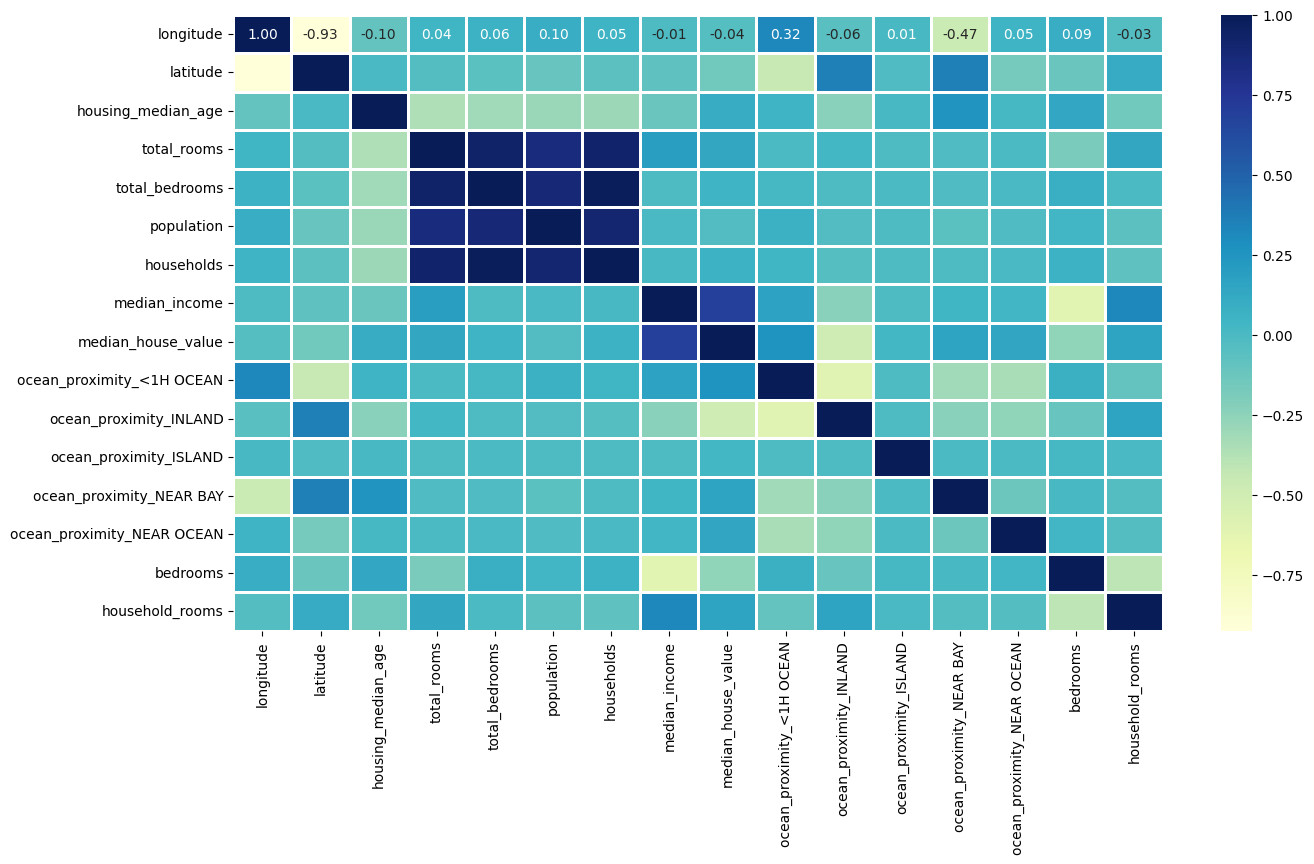

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), cmap='YlGnBu', linewidth=1, annot=True ,fmt=".2f")

In [52]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [53]:
test_data = X_test.join(y_train)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(train_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )

train_data['bedrooms']= train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/ train_data['households']